<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-Cleaning-Data" data-toc-modified-id="Loading-and-Cleaning-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and Cleaning Data</a></span></li><li><span><a href="#Data-Table-of-Totals,-%-of-Total,-and-%-of-Nights" data-toc-modified-id="Data-Table-of-Totals,-%-of-Total,-and-%-of-Nights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Table of Totals, % of Total, and % of Nights</a></span></li><li><span><a href="#Weekly-Data-Frame" data-toc-modified-id="Weekly-Data-Frame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Weekly Data Frame</a></span></li><li><span><a href="#Plotting-Data" data-toc-modified-id="Plotting-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting Data</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Loading and Cleaning Data

In [2]:
df = pd.ExcelFile('Hassayampa Pond Master.xlsx')
df = df.parse('Sheet1')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,ANTPAL,CORTOW,EPTFUS,EUDMAC,EUMPER,EUMUND,LASBLO,LASCIN,...,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,Species,NOID,NOISE,Total bats
0,2020-11-25,20201125,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,1.0,NaN,29.0,27.0,7.0,33.0,35.0,97.0
1,2020-11-26,20201126,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,6.0,31.0,7.0,43.0,52.0,112.0
2,2020-11-27,20201127,NaN,NaN,8.0,NaN,NaN,NaN,1.0,4.0,...,NaN,1.0,4.0,NaN,18.0,24.0,11.0,44.0,51.0,109.0
3,2020-11-28,20201128,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,10.0,NaN,25.0,32.0,7.0,41.0,59.0,114.0
4,2020-11-29,20201129,4.0,NaN,16.0,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,6.0,1.0,34.0,38.0,9.0,49.0,55.0,168.0


In [4]:
df.shape

(305, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  305 non-null    datetime64[ns]
 1   Unnamed: 1  305 non-null    int64         
 2   ANTPAL      204 non-null    float64       
 3   CORTOW      99 non-null     float64       
 4   EPTFUS      278 non-null    float64       
 5   EUDMAC      0 non-null      float64       
 6   EUMPER      3 non-null      float64       
 7   EUMUND      85 non-null     float64       
 8   LASBLO      214 non-null    float64       
 9   LASCIN      297 non-null    float64       
 10  LASNOC      296 non-null    float64       
 11  LASXAN      285 non-null    float64       
 12  MACCAL      15 non-null     float64       
 13  MYOCAL      232 non-null    float64       
 14  MYOCIL      223 non-null    float64       
 15  MYOEVO      52 non-null     float64       
 16  MYOOCC      64 non-null   

In [6]:
#Drop species that could not be verified. Also drop Unnamed: 1.
df = df.drop(columns = ['EUDMAC', 'EUMPER', 'MYOEVO', 'MYOOCC', 'MYOTHY', 'Unnamed: 1', 'NOISE'])

In [7]:
#Rename date column
df.rename({'Unnamed: 0': 'Date'}, axis=1, inplace=True)

In [8]:
df.columns

Index(['Date', 'ANTPAL', 'CORTOW', 'EPTFUS', 'EUMUND', 'LASBLO', 'LASCIN',
       'LASNOC', 'LASXAN', 'MACCAL', 'MYOCAL', 'MYOCIL', 'MYOVEL', 'MYOVOL',
       'MYOYUM', 'NYCFEM', 'NYCMAC', 'PARHES', 'TADBRA', 'Species', 'NOID',
       'Total bats'],
      dtype='object')

In [9]:
#Fill NA with 0
df = df.fillna(value = 0)

# Data Table of Totals, % of Total, and % of Nights

In [10]:
#Sum all detections
x = df.sum()

In [11]:
#% of all detections
y = df.sum() / df['Total bats'].sum() * 100

In [12]:
z = []
for i in list(x.index):
    z.append(round(sum(df[i] > 0) / 305 * 100, 2))

In [13]:
tots = pd.DataFrame()
tots['species'] = list(x.index)
tots['totals'] = list(x)
tots['% of total'] = list(round(y, 2))
tots['% of nights'] = z

In [14]:
#tots = tots.drop([18])
tots.index = tots.species
tots = tots.drop(columns = 'species')

In [15]:
tots.sort_values(by = ['totals'], ascending=False)

,totals,% of total,% of nights
species,,,
Total bats,212455.0,100.00,99.67
NOID,74991.0,35.30,99.67
TADBRA,27023.0,12.72,99.34
PARHES,25704.0,12.10,93.44
MYOCIL,18510.0,8.71,73.11
EPTFUS,16026.0,7.54,91.15
MYOYUM,9866.0,4.64,75.41
LASCIN,7821.0,3.68,97.38
LASNOC,6921.0,3.26,97.05


In [16]:
df.index = df['Date']

In [17]:
df.Date.max()

Timestamp('2021-12-01 00:00:00')

In [18]:
df.Date.min()

Timestamp('2020-11-25 00:00:00')

# Weekly Data Frame

In [19]:
#Make weekly average dataframe
weekly = df.resample('W', on='Date').mean()  
weekly.shape

(54, 21)

In [20]:
#Fill NA's in weekly dataframe to connect linearly from last value to next value
weekly = weekly.interpolate(method ='linear', limit_direction ='forward') 

In [21]:
#Make weekly average standard error dataframe
se = df.resample('W', on='Date').sem()  
se.shape

(54, 21)

In [22]:
#Fill NA's in standard error dataframe to connect linearly from last value to next value
se = se.interpolate(method ='linear', limit_direction ='forward') 

In [23]:
weekly = weekly.merge(se, on = 'Date', suffixes=('', '_se'))

In [24]:
weekly.to_csv('hassayampapondweekly.csv')

# Plotting Data

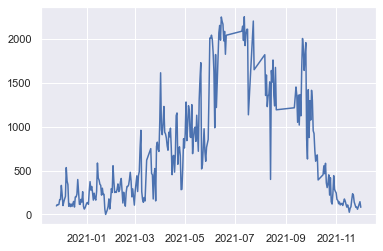

In [25]:
#Plot total bats detected nightly
sns.set()
plt.plot(df['Total bats'])
plt.show()

<ipython-input-26-9306b112a7ea>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


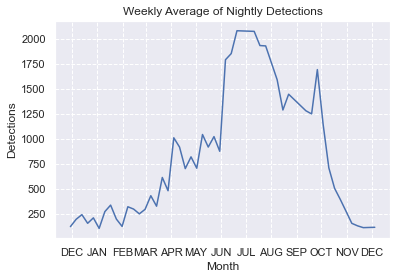

In [26]:
#Plot weekly average of bats detected 
months = ['DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.plot(weekly['Total bats'])
ax = plt.axes()
plt.xlabel('Month')
plt.ylabel('Detections')
plt.title('Weekly Average of Nightly Detections')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.set_xticklabels(months)
plt.grid(linestyle = '--')
plt.show()

<ipython-input-27-c04102c209c0>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


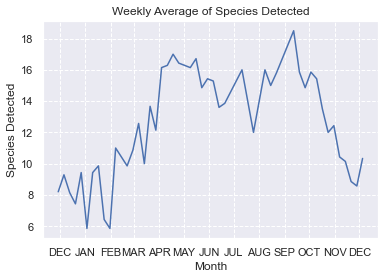

In [27]:
#Plot weekly average of bat species detected 
months = ['DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.plot(weekly['Species'])
ax = plt.axes()
plt.xlabel('Month')
plt.ylabel('Species Detected')
plt.title('Weekly Average of Species Detected')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.set_xticklabels(months)
plt.grid(linestyle = '--')
plt.show()

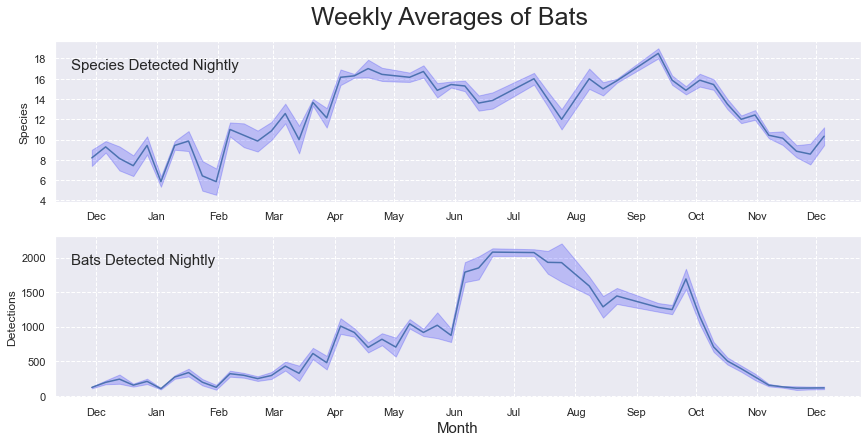

In [28]:
#Plotting the above two plots together in a subplot for better display of data.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
fig.suptitle('Weekly Averages of Bats', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
sns.set()

#Total species
ax1.plot(weekly.Species)
ax1.text(0.02, 0.85, 'Species Detected Nightly', fontsize = 15, horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes)
ax1.set(ylabel = 'Species')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.fill_between(weekly.index, weekly['Species'] - weekly['Species_se'], weekly['Species'] + 
                weekly['Species_se'], color = 'blue', alpha = 0.2)
ax1.grid(linestyle = '--')

#Total Detections
ax2.plot(weekly['Total bats'])
ax2.set(ylabel = 'Detections')
ax2.text(0.02, 0.85, 'Bats Detected Nightly', fontsize = 15, horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.fill_between(weekly.index, weekly['Total bats'] - weekly['Total bats_se'], 
                weekly['Total bats'] + weekly['Total bats_se'], color = 'blue', alpha = 0.2)
ax2.grid(linestyle = '--')

plt.xlabel("Month", fontsize = '15')
plt.show()

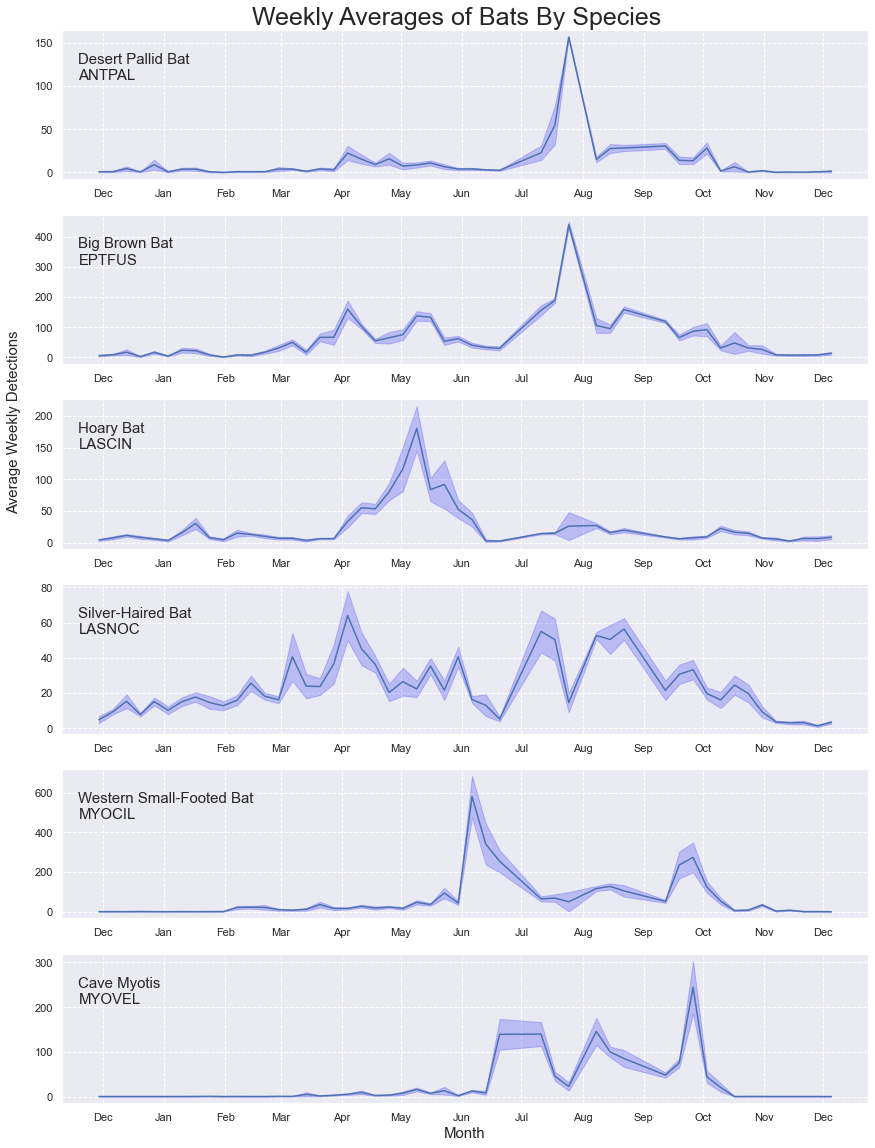

In [29]:
#Plotting the most common species and species of interest.

fig, (ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(-0.02, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)
sns.set()

#ANTPAL
ax3.plot(weekly.ANTPAL, label = 'Weekly')
ax3.text(0.02, 0.85, 'Desert Pallid Bat \nANTPAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax3.transAxes)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax3.grid(linestyle = '--')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.fill_between(weekly.index, weekly['ANTPAL'] - weekly['ANTPAL_se'], 
                weekly['ANTPAL'] + weekly['ANTPAL_se'], color = 'blue', alpha = 0.2)

#EPTFUS
ax4.plot(weekly.EPTFUS, label = 'Weekly')
ax4.text(0.02, 0.85, 'Big Brown Bat \nEPTFUS', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes)
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax4.grid(linestyle = '--')
ax4.fill_between(weekly.index, weekly['EPTFUS'] - weekly['EPTFUS_se'], 
                weekly['EPTFUS'] + weekly['EPTFUS_se'], color = 'blue', alpha = 0.2)

#LASCIN
ax5.plot(weekly.LASCIN, label = 'Weekly')
ax5.text(0.02, 0.85, 'Hoary Bat \nLASCIN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax5.transAxes)
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax5.grid(linestyle = '--')
ax5.fill_between(weekly.index, weekly['LASCIN'] - weekly['LASCIN_se'], 
                weekly['LASCIN'] + weekly['LASCIN_se'], color = 'blue', alpha = 0.2)

#LASNOC
ax6.plot(weekly.LASNOC, label = 'Weekly')
ax6.text(0.02, 0.85, 'Silver-Haired Bat \nLASNOC', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax6.transAxes)
ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax6.grid(linestyle = '--')
ax6.fill_between(weekly.index, weekly['LASNOC'] - weekly['LASNOC_se'], 
                weekly['LASNOC'] + weekly['LASNOC_se'], color = 'blue', alpha = 0.2)

#MYOCIL
ax7.plot(weekly.MYOCIL, label = 'Weekly')
ax7.text(0.02, 0.85, 'Western Small-Footed Bat \nMYOCIL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax7.transAxes)
ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax7.grid(linestyle = '--')
ax7.fill_between(weekly.index, weekly['MYOCIL'] - weekly['MYOCIL_se'], 
                weekly['MYOCIL'] + weekly['MYOCIL_se'], color = 'blue', alpha = 0.2)

#MYOVEL
ax8.plot(weekly.MYOVEL, label = 'Weekly')
ax8.text(0.02, 0.85, 'Cave Myotis \nMYOVEL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax8.transAxes)
ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax8.grid(linestyle = '--')
ax8.fill_between(weekly.index, weekly['MYOVEL'] - weekly['MYOVEL_se'], 
                weekly['MYOVEL'] + weekly['MYOVEL_se'], color = 'blue', alpha = 0.2)

plt.show()

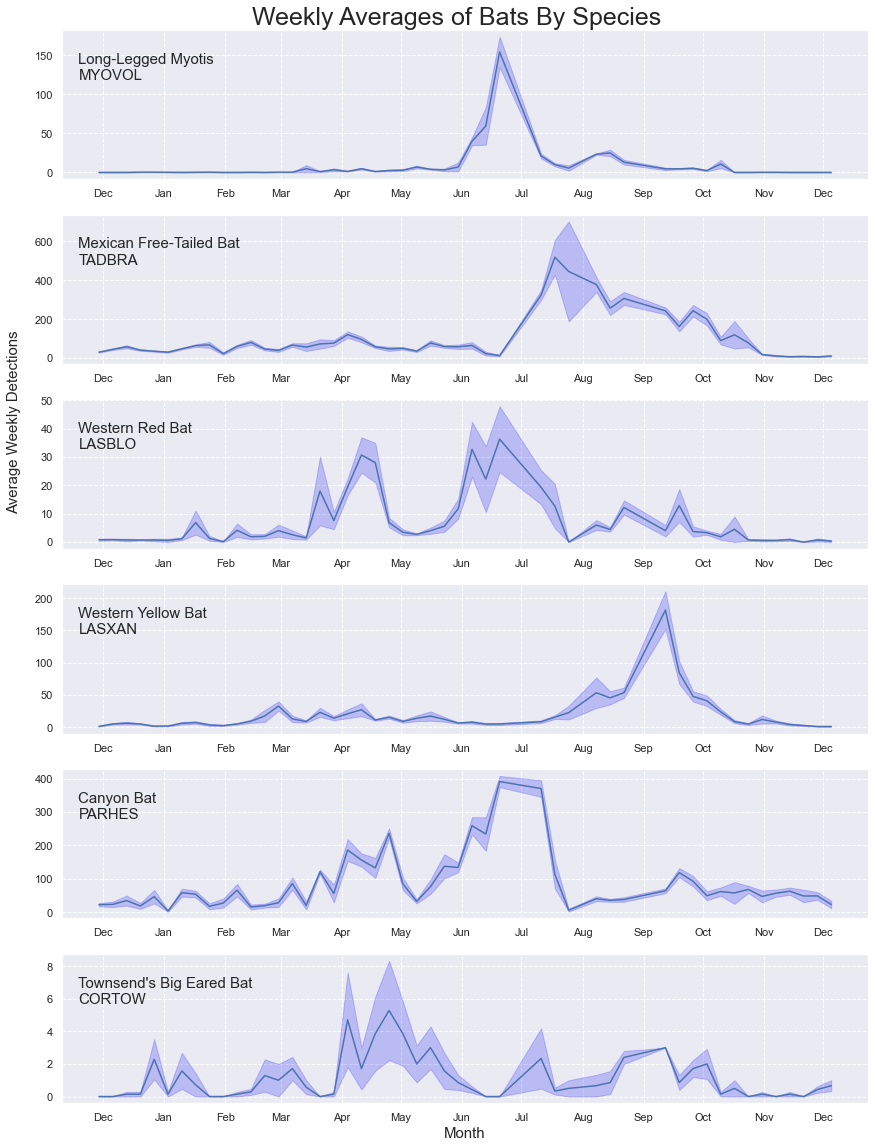

In [30]:
#Plotting the most common species and species of interest.  
#Two different subplots for better viewing of data.

fig, (ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(-0.02, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)
sns.set()

#MYOVOL
ax9.plot(weekly.MYOVOL, label = 'Weekly')
ax9.text(0.02, 0.85, 'Long-Legged Myotis \nMYOVOL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax9.transAxes)
ax9.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax9.grid(linestyle = '--')
ax9.fill_between(weekly.index, weekly['MYOVOL'] - weekly['MYOVOL_se'], 
                weekly['MYOVOL'] + weekly['MYOVOL_se'], color = 'blue', alpha = 0.2)

#TADBRA
ax10.plot(weekly.TADBRA, label = 'Weekly')
ax10.text(0.02, 0.85, 'Mexican Free-Tailed Bat \nTADBRA', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax10.transAxes)
ax10.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax10.grid(linestyle = '--')
ax10.fill_between(weekly.index, weekly['TADBRA'] - weekly['TADBRA_se'], 
                weekly['TADBRA'] + weekly['TADBRA_se'], color = 'blue', alpha = 0.2)

#LASBLO
ax11.plot(weekly.LASBLO, label = 'Weekly')
ax11.text(0.02, 0.85, 'Western Red Bat \nLASBLO', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax11.transAxes)
ax11.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax11.grid(linestyle = '--')
ax11.fill_between(weekly.index, weekly['LASBLO'] - weekly['LASBLO_se'], 
                weekly['LASBLO'] + weekly['LASBLO_se'], color = 'blue', alpha = 0.2)

#LASXAN
ax12.plot(weekly.LASXAN, label = 'Weekly')
ax12.text(0.02, 0.85, 'Western Yellow Bat \nLASXAN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax12.transAxes)
ax12.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax12.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax12.grid(linestyle = '--')
ax12.fill_between(weekly.index, weekly['LASXAN'] - weekly['LASXAN_se'], 
                weekly['LASXAN'] + weekly['LASXAN_se'], color = 'blue', alpha = 0.2)

#PARHES
ax13.plot(weekly.PARHES, label = 'Weekly')
ax13.text(0.02, 0.85, 'Canyon Bat \nPARHES', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax13.transAxes)
ax13.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax13.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax13.grid(linestyle = '--')
ax13.fill_between(weekly.index, weekly['PARHES'] - weekly['PARHES_se'], 
                weekly['PARHES'] + weekly['PARHES_se'], color = 'blue', alpha = 0.2)

#CORTOW
ax14.plot(weekly.CORTOW, label = 'Weekly')
plt.xlabel('Month')
ax14.text(0.02, 0.85, "Townsend's Big Eared Bat \nCORTOW", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax14.transAxes)
ax14.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax14.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax14.grid(linestyle = '--')
ax14.fill_between(weekly.index, weekly['CORTOW'] - weekly['CORTOW_se'], 
                weekly['CORTOW'] + weekly['CORTOW_se'], color = 'blue', alpha = 0.2)

plt.show()

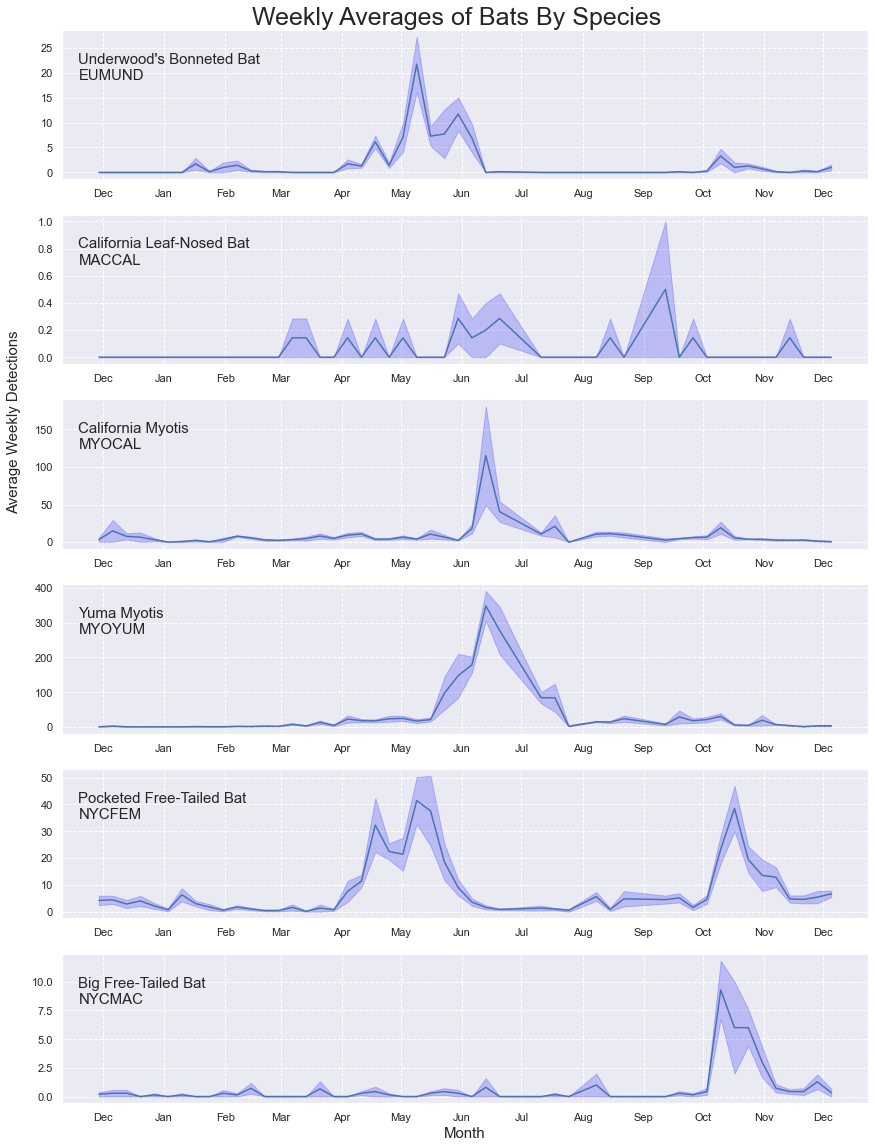

In [31]:
#Plotting the less common species and species of interest.  

fig, (ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(-0.02, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)
sns.set()

#EUMUND
ax9.plot(weekly.EUMUND, label = 'Weekly')
ax9.text(0.02, 0.85, "Underwood's Bonneted Bat \nEUMUND", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax9.transAxes)
ax9.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax9.grid(linestyle = '--')
ax9.fill_between(weekly.index, weekly['EUMUND'] - weekly['EUMUND_se'], 
                weekly['EUMUND'] + weekly['EUMUND_se'], color = 'blue', alpha = 0.2)


#MACCAL 
ax10.plot(weekly.MACCAL, label = 'Weekly')
ax10.text(0.02, 0.85, 'California Leaf-Nosed Bat \nMACCAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax10.transAxes)
ax10.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax10.grid(linestyle = '--')
ax10.fill_between(weekly.index, weekly['MACCAL'] - weekly['MACCAL_se'], 
                weekly['MACCAL'] + weekly['MACCAL_se'], color = 'blue', alpha = 0.2)

#MYOCAL
ax11.plot(weekly.MYOCAL, label = 'Weekly')
ax11.text(0.02, 0.85, 'California Myotis \nMYOCAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax11.transAxes)
ax11.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax11.grid(linestyle = '--')
ax11.fill_between(weekly.index, weekly['MYOCAL'] - weekly['MYOCAL_se'], 
                weekly['MYOCAL'] + weekly['MYOCAL_se'], color = 'blue', alpha = 0.2)

#MYOYUM
ax12.plot(weekly.MYOYUM, label = 'Weekly')
ax12.text(0.02, 0.85, 'Yuma Myotis \nMYOYUM', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax12.transAxes)
ax12.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax12.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax12.grid(linestyle = '--')
ax12.fill_between(weekly.index, weekly['MYOYUM'] - weekly['MYOYUM_se'], 
                weekly['MYOYUM'] + weekly['MYOYUM_se'], color = 'blue', alpha = 0.2)

#NYCFEM
ax13.plot(weekly.NYCFEM, label = 'Weekly')
ax13.text(0.02, 0.85, 'Pocketed Free-Tailed Bat \nNYCFEM', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax13.transAxes)
ax13.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax13.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax13.grid(linestyle = '--')
ax13.fill_between(weekly.index, weekly['NYCFEM'] - weekly['NYCFEM_se'], 
                weekly['NYCFEM'] + weekly['NYCFEM_se'], color = 'blue', alpha = 0.2)

#NYCMAC
ax14.plot(weekly.NYCMAC, label = 'Weekly')
plt.xlabel('Month')
ax14.text(0.02, 0.85, "Big Free-Tailed Bat \nNYCMAC", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax14.transAxes)
ax14.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax14.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax14.grid(linestyle = '--')
ax14.fill_between(weekly.index, weekly['NYCMAC'] - weekly['NYCMAC_se'], 
                weekly['NYCMAC'] + weekly['NYCMAC_se'], color = 'blue', alpha = 0.2)

plt.show()